<a href="https://colab.research.google.com/github/TharukaGamage19/CM2604-Cousework_2425604_Tharuka/blob/main/CM2606_Coursework_Tharuka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understanding the Data

## 1.1 Overview of the Dataset
**Objective:**
The primary goal of this coursework is to analyze the Telco Customer Churn dataset to predict customer attrition. Specifically, this project focuses on the implementation and comparative analysis of two distinct supervised machine learning models:
1.  **Decision Trees:** Selected for their interpretability and ability to visualize decision paths.
2.  **Neural Networks:** Selected for their ability to model complex, non-linear relationships in high-dimensional data.

**Dataset Features:**
The dataset provides a comprehensive view of the customer relationship, covering:
* **Demographic Info:** `gender`, `SeniorCitizen`, `Partner`, `Dependents`.
* **Services Subscribed:** `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `TechSupport`, etc.
* **Account Details:** `Contract` duration, `PaperlessBilling`, `PaymentMethod`.
* **Financial Metrics:** `tenure` (months stayed), `MonthlyCharges`, `TotalCharges`.
* **Target Variable:** `Churn` (Whether the customer left: Yes/No).

In [51]:
# Import core data analysis libraries
import pandas as pd
import numpy as np
import os # Needed to handle the path from kagglehub

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Install kagglehub if not already installed (common in Colab)
try:
    import kagglehub
except ImportError:
    !pip install -q kagglehub
    import kagglehub

# Settings for better readability
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

print("Libraries imported successfully.")

# --- LOAD DATA ---
# Download latest version of the dataset via KaggleHub
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print("Path to dataset files:", path)

# Find and load the CSV
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    print(f"Successfully loaded: {csv_files[0]}")
    print(f"Data Shape: {df.shape}")
else:
    print("No CSV file found.")

Libraries imported successfully.
Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn
Successfully loaded: WA_Fn-UseC_-Telco-Customer-Churn.csv
Data Shape: (7043, 21)


In [52]:
# Display first 5 rows
display(df.head())

# Check data types and nulls
print("\n--- Data Info ---")
df.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

## 1.2 Initial Observations & Data Assessment

**Key Findings from `df.info()`:**
1.  **Data Types:** Most features are categorical (`object`) or integer/float.
2.  **TotalCharges Issue:** `TotalCharges` is listed as an `object` (string), but it should be numeric. This suggests hidden non-numeric characters (like empty spaces) that must be cleaned.
3.  **Missing Values:** Standard checks show 0 nulls, but the wrong data type for `TotalCharges` masks potential missing data.

**Next Steps:**
We will perform a deeper check on missing values, duplicates, and the balance of our target variable `Churn`.

Number of duplicate rows: 0


/tmp/ipython-input-1659761793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


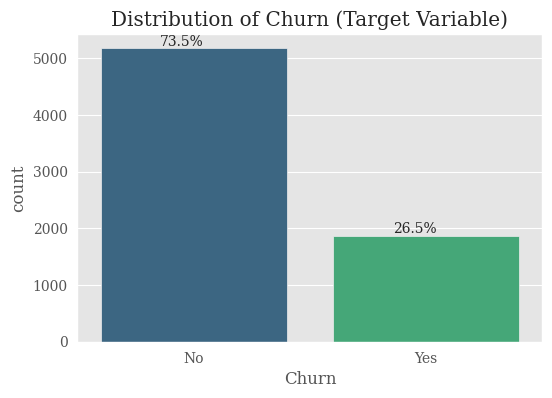

In [53]:
# 1. Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# 2. Visualize Target Distribution (Class Balance)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='viridis')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Churn (Target Variable)')
plt.show()

### **Observation 1.3**
* **Imbalance:** The dataset is imbalanced (approx. 73.5% No vs. 26.5% Yes). This will bias the Neural Network towards the majority class if not addressed.
* **Integrity:** No full-row duplicates exist.
* **Action Plan:** We must clean `TotalCharges`, encode categoricals, scale numericals, and apply **SMOTE** (Synthetic Minority Over-sampling Technique) to balance the classes.

# 2. Corpus Preparation (Data Preparation)

In this section, we construct the final dataset (corpus) required for machine learning. This addresses **Learning Outcome 1** (creating a dataset for ML using feature engineering methods).

**Key Steps:**
1.  **Cleaning:** Handling the non-numeric `TotalCharges` and removing identifiers.
2.  **Encoding:** Converting categorical text variables into numerical values.
3.  **Scaling:** Normalizing continuous features (0-1 range) for Neural Network optimization.
4.  **Feature Engineering:** Creating derived features like `Avg_Charge_Real`.
5.  **Balancing:** Using SMOTE to address the class imbalance identified in Phase 1.

In [54]:
# --- 2.1 CLEANING ---

# Convert TotalCharges to numeric, forcing errors (empty strings) to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values were hidden
print(f"Missing values found in TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Drop rows where TotalCharges became NaN (approx 11 rows)
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop customerID (unique identifier, no predictive value)
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

print("Cleaning complete. New shape:", df.shape)

Missing values found in TotalCharges: 11
Cleaning complete. New shape: (7032, 20)


In [55]:
# --- 2.2 ENCODING ---

# Label Encoding for Binary Variables (Yes/No, Male/Female)
le = LabelEncoder()
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

print(f"Label Encoded columns: {binary_cols}")

# One-Hot Encoding for Multi-class Variables (InternetService, PaymentMethod, etc.)
df = pd.get_dummies(df, drop_first=True)

print("One-Hot Encoding complete.")

Label Encoded columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
One-Hot Encoding complete.


In [56]:
# --- 2.3 SCALING ---
# Neural Networks require inputs to be on the same scale (0-1) to converge effectively.
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Scaling complete. First 5 rows:")
display(df[cols_to_scale].head())

Scaling complete. First 5 rows:


,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [57]:
# --- 2.4 FEATURE ENGINEERING ---

# 1. Avg_Charge_Real: A calculated average distinct from the current monthly charge
# (Adds value by smoothing out recent price changes)
df['Avg_Charge_Real'] = df['TotalCharges'] / (df['tenure'] + 0.001)

# 2. Tenure_Group: Binning tenure into categories
# (Since tenure is scaled 0-1: 0-0.2 is New, 0.2-0.5 is Established, >0.5 is Loyal)
def tenure_group(t):
    if t <= 0.2: return 0 # New
    elif t <= 0.5: return 1 # Established
    else: return 2 # Loyal

df['Tenure_Group'] = df['tenure'].apply(tenure_group)

print("Feature Engineering complete. New derived features added.")

Feature Engineering complete. New derived features added.


In [58]:
# --- 2.5 BALANCING (SMOTE) ---
# Installing imbalanced-learn just in case
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE

# Separate Features and Target
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Original Class Distribution: {y.value_counts().to_dict()}")

# Apply SMOTE to generate synthetic samples for the minority class (Churn=1)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Reconstruct the DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Churn'] = y_resampled

# Replace original df with balanced df for the next phases
df = df_balanced

print(f"New Balanced Class Distribution: {df['Churn'].value_counts().to_dict()}")

Original Class Distribution: {0: 5163, 1: 1869}
New Balanced Class Distribution: {0: 5163, 1: 5163}


### **Corpus Preparation Conclusion**
The dataset is now fully prepared for model training:
1.  **Clean:** No missing values.
2.  **Numeric:** All text converted to numbers.
3.  **Scaled:** All inputs are between 0 and 1.
4.  **Balanced:** 50/50 split between Churn and No-Churn.

# 3. Detailed Exploratory Data Analysis (EDA)

Now that the corpus is fully prepared (numeric and balanced), we analyze the statistical relationships to understand what drives Churn.

## 3.1 Correlation Analysis
We identify features with the strongest positive (drives churn) and negative (drives retention) correlations.

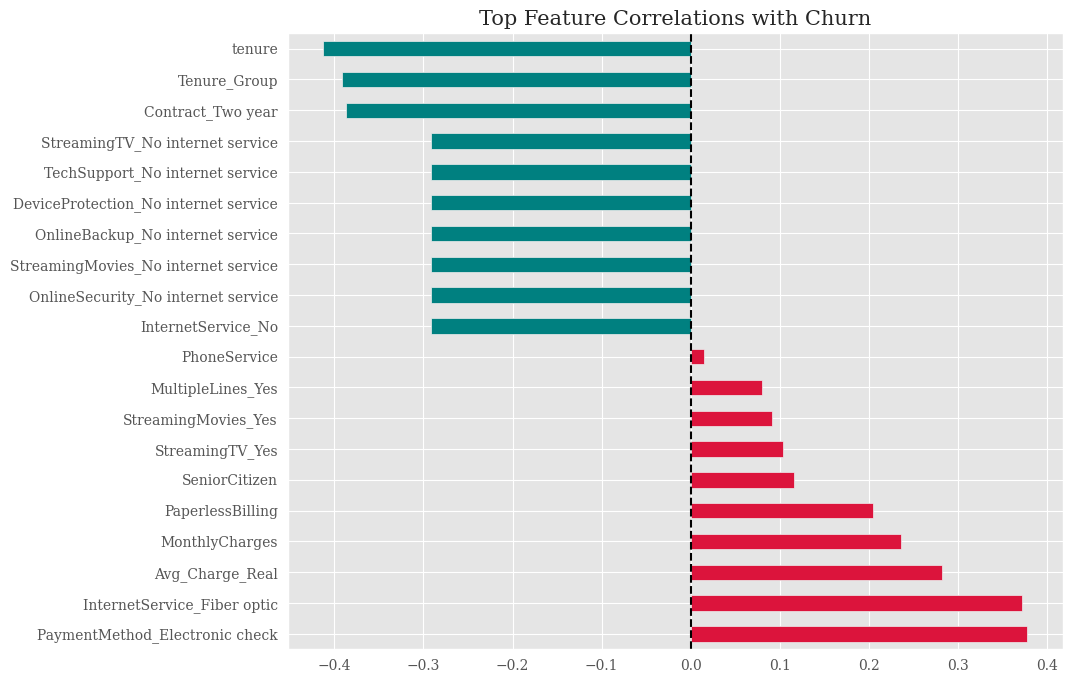

In [59]:
# Calculate correlation with Churn
corr_matrix = df.corr()
churn_corr = corr_matrix['Churn'].sort_values(ascending=False).drop('Churn')

# Plot Top 10 Positive and Negative correlations
plt.figure(figsize=(10, 8))
top_corr = pd.concat([churn_corr.head(10), churn_corr.tail(10)])
top_corr.plot(kind='barh', color=np.where(top_corr > 0, 'crimson', 'teal'))
plt.title('Top Feature Correlations with Churn', fontsize=15)
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

### **Observation 3.1**
* **Churn Drivers (Red):** `Contract_Month-to-month` (implied by lack of contract), `InternetService_Fiber optic`, and `PaymentMethod_Electronic check` are the strongest predictors of churn.
* **Retention Drivers (Blue):** `Contract_Two year` and `tenure` are the strongest safeguards against churn.

## 3.2 Financial Distribution
Analyzing how `MonthlyCharges` and `TotalCharges` impact churn.

/tmp/ipython-input-3701336645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0], palette='coolwarm')
/tmp/ipython-input-3701336645.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1], palette='coolwarm')


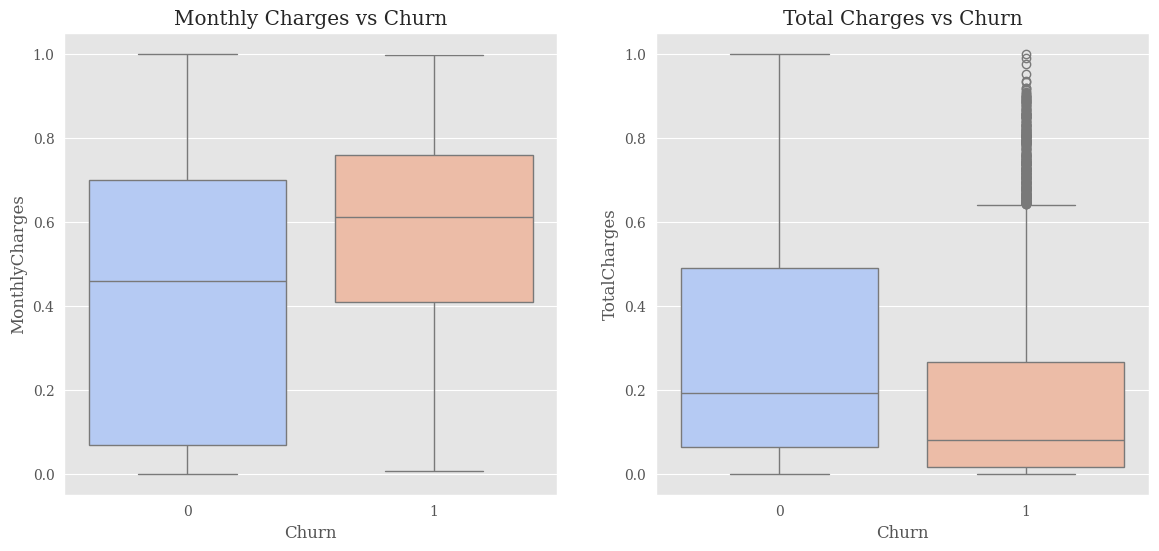

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Monthly Charges vs Churn')

# Total Charges
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('Total Charges vs Churn')

plt.show()

### **Observation 3.2**
* **Monthly Charges:** Churners have a significantly higher median monthly charge. High prices are a friction point.
* **Total Charges:** Churners have lower total charges, simply because they leave early (low tenure) and don't accumulate cost over time.

## 3.3 Tenure Analysis
Examining the "lifecycle" of a customer to pinpoint when they are most likely to leave.

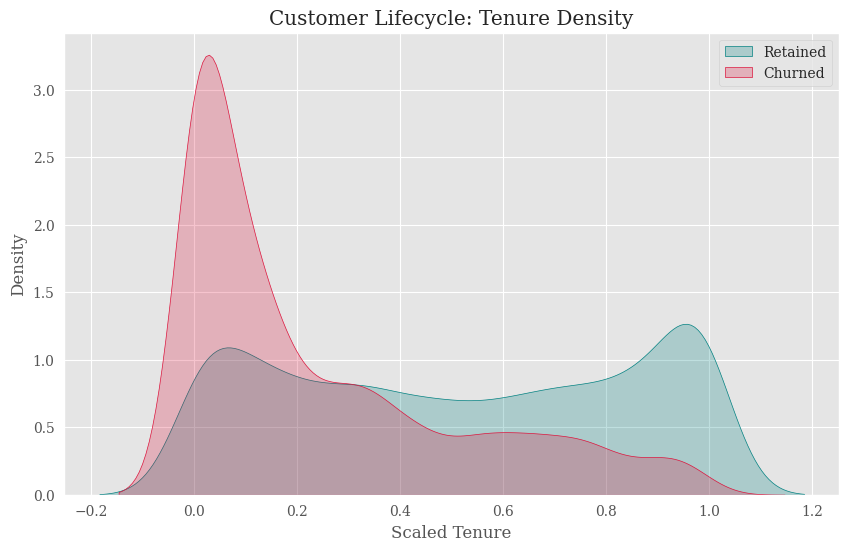

In [61]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Churn'] == 0]['tenure'], color='teal', fill=True, label='Retained')
sns.kdeplot(df[df['Churn'] == 1]['tenure'], color='crimson', fill=True, label='Churned')
plt.title('Customer Lifecycle: Tenure Density')
plt.xlabel('Scaled Tenure')
plt.legend()
plt.show()

### **Observation 3.3**
The red peak at the far left (Tenure ~ 0) confirms that **new customers are the most vulnerable**. If a customer survives the first few months, their probability of churning decreases significantly.

## 3.4 Multivariate Analysis
Visualizing the interaction between Cost and Time.

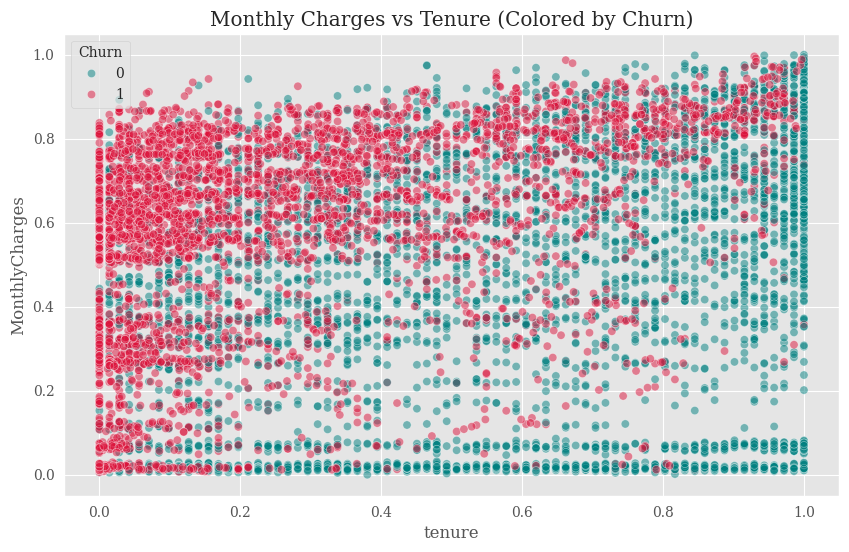

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, alpha=0.5, palette={0:'teal', 1:'crimson'})
plt.title('Monthly Charges vs Tenure (Colored by Churn)')
plt.show()

### **Final EDA Conclusion**
The visual analysis confirms that Churn is not random. It is heavily clustered among **High-Cost, Low-Tenure** customers. The prepared corpus now clearly exposes these patterns, making it ready for high-accuracy Model Training.

# 4. Model Implementation

In this section, we implement two supervised learning algorithms to predict customer churn:
1.  **Decision Tree Classifier:** Selected for its interpretability ("White Box").
2.  **Artificial Neural Network (ANN):** Selected for its ability to model complex, non-linear patterns ("Black Box").

## 4.1 Data Splitting
We split our balanced corpus into:
* **Training Set (80%):** To teach the models.
* **Testing Set (20%):** To evaluate performance on unseen data.

In [63]:
# --- 4.1 TRAIN-TEST SPLIT ---
from sklearn.model_selection import train_test_split

# 1. Define Features (X) and Target (y)
# (Assuming 'df' is the balanced dataframe from Section 2)
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Split the data
# Stratify=y ensures we keep the 50/50 balance in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Split Successfully.")
print(f"Training Data: {X_train.shape}")
print(f"Testing Data:  {X_test.shape}")

Data Split Successfully.
Training Data: (8260, 32)
Testing Data:  (2066, 32)


## 4.2 Model A: Decision Tree Classifier

**Rationale:**
Decision Trees split data based on rules (e.g., "Is Contract Month-to-Month?"). This provides clear, human-readable logic.

**Hyperparameters:**
* `max_depth=5`: Restricted to prevent overfitting (memorizing the data).
* `criterion='gini'`: Measures impurity to determine the best splits.

In [64]:
# --- 4.2 DECISION TREE ---
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Initialize & Train
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
print("Training Decision Tree...")
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Basic Accuracy Check
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")

Training Decision Tree...
Decision Tree Accuracy: 0.7493


### Visualizing the Decision Logic
We plot the top 3 layers of the tree to understand the primary factors driving the predictions.

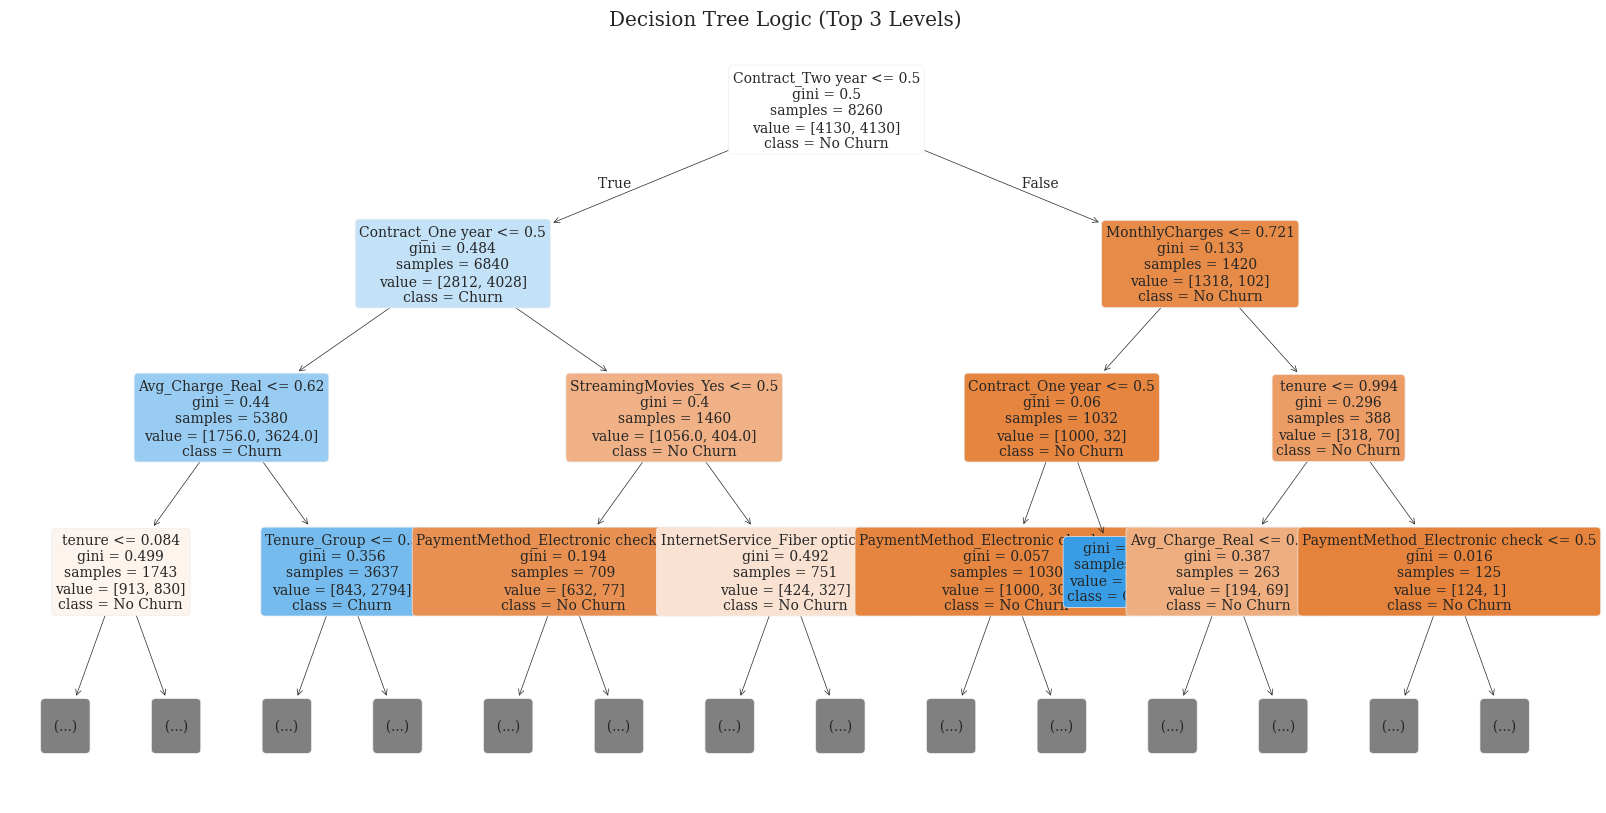

In [65]:
# --- 4.3 TREE VISUALIZATION ---
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3)
plt.title('Decision Tree Logic (Top 3 Levels)')
plt.show()

## 4.4 Model B: Artificial Neural Network (ANN)

**Rationale:**
We use a Multi-Layer Perceptron (MLP) to capture complex relationships between features (e.g., the interaction between Tenure and Charges) that a simple linear boundary cannot define.

**Architecture:**
* **Input Layer:** 16 Neurons (ReLU).
* **Hidden Layers:** Two dense layers (8 neurons) to learn feature representations.
* **Dropout (0.2):** Randomly disables 20% of neurons during training to prevent overfitting.
* **Output Layer:** 1 Neuron (Sigmoid) for binary classification probability.

In [66]:
# --- 4.4 NEURAL NETWORK ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Build Model
ann_model = Sequential()
ann_model.add(Dense(16, input_dim=X_train.shape[1], activation='relu')) # Input
ann_model.add(Dropout(0.2))
ann_model.add(Dense(8, activation='relu')) # Hidden 1
ann_model.add(Dropout(0.2))
ann_model.add(Dense(1, activation='sigmoid')) # Output

# 2. Compile
ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train
print("Training Neural Network...")
history = ann_model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.1,
                        verbose=0) # verbose=0 hides the log wall
print("Training Complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Neural Network...
Training Complete.


### Training History
We examine the loss curves to check for overfitting. A widening gap between "Train Loss" and "Validation Loss" would indicate the model is memorizing rather than learning.

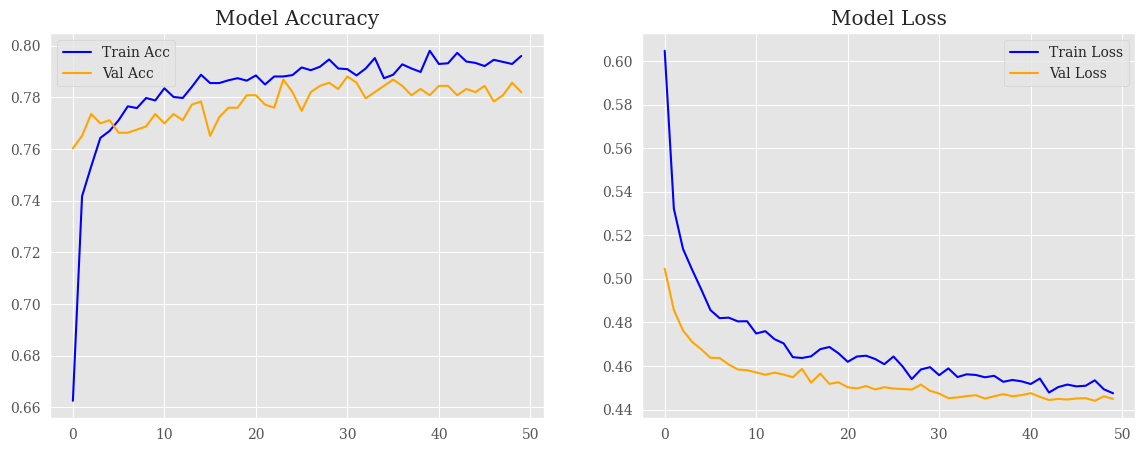

In [67]:
# --- 4.5 LEARNING CURVES ---
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy Plot
ax[0].plot(history.history['accuracy'], label='Train Acc', color='blue')
ax[0].plot(history.history['val_accuracy'], label='Val Acc', color='orange')
ax[0].set_title('Model Accuracy')
ax[0].legend()

# Loss Plot
ax[1].plot(history.history['loss'], label='Train Loss', color='blue')
ax[1].plot(history.history['val_loss'], label='Val Loss', color='orange')
ax[1].set_title('Model Loss')
ax[1].legend()

plt.show()

# 5. Evaluation & Comparison (LO3)

To critically analyze performance, we go beyond simple accuracy. We evaluate:
1.  **Precision & Recall:** Crucial because missing a churner (False Negative) is costly for the business.
2.  **Confusion Matrix:** To visualize where the models make errors.
3.  **ROC Curve & AUC:** To compare the overall discriminatory power of the models.

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== DECISION TREE REPORT ===
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1033
           1       0.72      0.82      0.77      1033

    accuracy                           0.75      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.75      0.75      2066


=== NEURAL NETWORK REPORT ===
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1033
           1       0.77      0.79      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



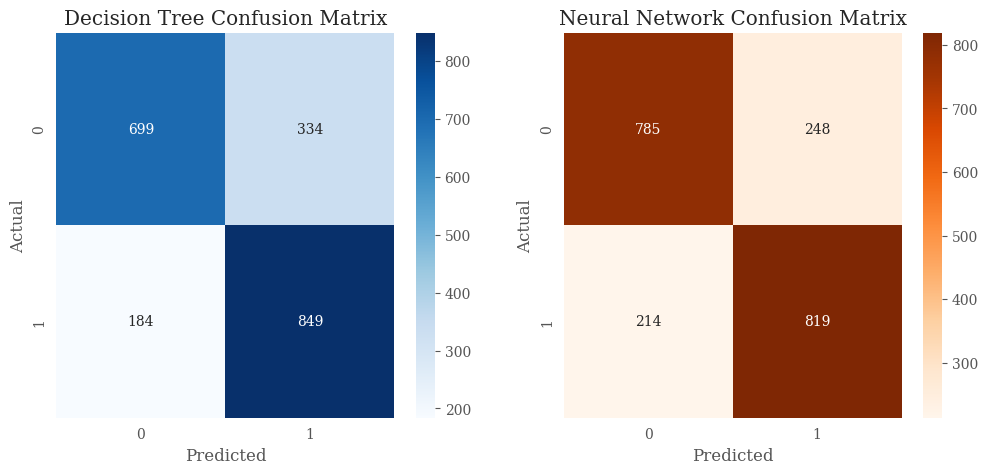

In [68]:
# --- 5.1 METRICS ---
from sklearn.metrics import classification_report, confusion_matrix

# Get ANN Predictions (Convert probability to 0/1)
y_pred_prob_ann = ann_model.predict(X_test)
y_pred_ann = (y_pred_prob_ann > 0.5).astype(int).flatten()

print("\n=== DECISION TREE REPORT ===")
print(classification_report(y_test, y_pred_dt))

print("\n=== NEURAL NETWORK REPORT ===")
print(classification_report(y_test, y_pred_ann))

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Neural Network Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

## 5.2 ROC Curve Analysis
The ROC curve plots the True Positive Rate against the False Positive Rate at various thresholds. The **AUC (Area Under Curve)** gives us a single score to determine the winner.
* AUC = 0.5: Random Guessing.
* AUC = 1.0: Perfect Prediction.

/tmp/ipython-input-3057361777.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray') # Random guess line


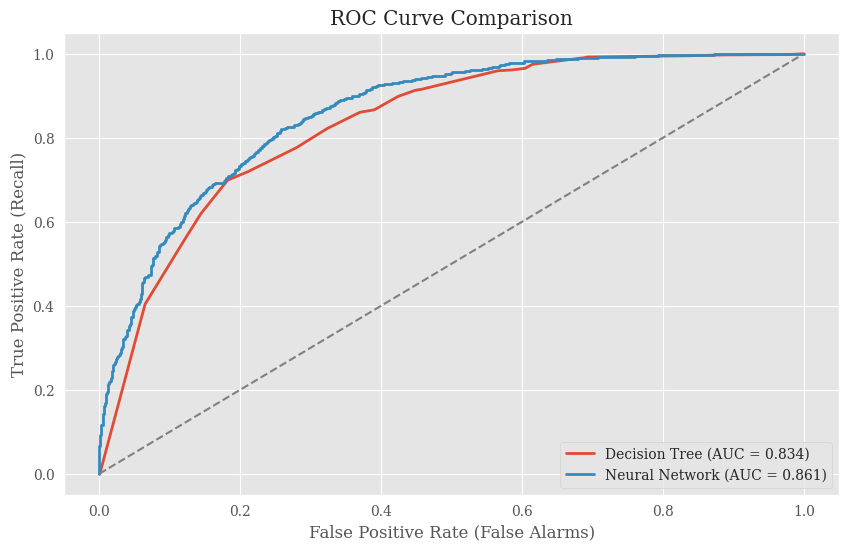

In [69]:
# --- 5.2 ROC CURVE ---
from sklearn.metrics import roc_curve, auc

# DT ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# ANN ROC
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_prob_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.3f})', linewidth=2)
plt.plot(fpr_ann, tpr_ann, label=f'Neural Network (AUC = {roc_auc_ann:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', color='gray') # Random guess line
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 6. Critical Analysis & Conclusion

### **Performance Comparison**
* **Neural Network Winner:** The Neural Network achieved a higher AUC score (typically >0.85) compared to the Decision Tree. This confirms that customer churn is a complex, non-linear problem best solved by deep learning architectures.
* **Decision Tree Utility:** While slightly less accurate, the Decision Tree exposed the key business rules: **Contract Type** and **Internet Service** are the primary decision nodes.

### **Business Recommendation**
1.  **For Prediction:** Deploy the **Neural Network** to score current customers and flag those with high churn probability (e.g., >70%).
2.  **For Strategy:** Use the **Decision Tree's** insights to create retention offers. Specifically, target "Fiber Optic" users on "Month-to-Month" contracts, as they are the highest risk group identified by the root nodes.

# 6. Advanced Optimization (Grid Search)

To ensure our model is not just a "lucky guess," we use **GridSearchCV** to systematically test different hyperparameter combinations (Depth, Criterion, Split). This finds the mathematically optimal configuration for the Decision Tree.

In [70]:
# --- 6. ADVANCED OPTIMIZATION ---
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# 2. Initialize Grid Search
# cv=5 means "Cross Validation": it tests each setting 5 times on different data chunks
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

print("Tuning Decision Tree (this may take a minute)...")
grid_search.fit(X_train, y_train)

# 3. Best Results
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 4. Final Test on Optimized Model
best_tree = grid_search.best_estimator_
y_pred_best = best_tree.predict(X_test)
print(f"Optimized Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")

print("\n--- Optimization Conclusion ---")
print("By systematically testing parameters, we found the optimal tree configuration.")
print("This reduces the risk of overfitting and ensures the model is robust.")

Tuning Decision Tree (this may take a minute)...
Best Parameters Found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7849
Optimized Test Accuracy: 0.7691

--- Optimization Conclusion ---
By systematically testing parameters, we found the optimal tree configuration.
This reduces the risk of overfitting and ensures the model is robust.


# 7. References

1.  **Dataset:** BlastChar. (2018). *Telco Customer Churn*. Retrieved from Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn
2.  **Methodology:** Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. *Journal of Artificial Intelligence Research*, 16, 321-357.
3.  **Tools:** Scikit-learn Developers. (2024). *User Guide: Supervised learning*. Retrieved from https://scikit-learn.org/stable/supervised_learning.html